<a href="https://colab.research.google.com/github/Vilmo18/computer_vision/blob/main/carre_CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Yvan CARRE**

##Assignment 1 : Computer Vision


## Import

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from collections import Counter
from collections import Counter

import cv2
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image


from keras.models import Sequential
import cv2
import scipy.misc
import tensorflow
import tensorflow.keras as k


from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau



from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image




## Help functions

In [ ]:
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

# Plot loss and accuracy
def plot_loss_and_accuracy(history):

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax1.plot(history.history['val_loss'], label='Validation Loss',  linewidth=2)
    ax1.set_title('Model Loss During Training')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    if 'accuracy' in history.history and 'val_accuracy' in history.history:
        ax2.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
        ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
        ax2.set_title('Model Accuracy During Training')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True)
    else:
        print("Accuracy data not found in history. Skipping accuracy plot.")
    plt.tight_layout()
    plt.show()

# Plot to plot all the history for summary
def plot_multiple_histories(histories, model_infos):
    fig, axes = plt.subplots(2, 6, figsize=(30, 10))
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

    for i, (history, info) in enumerate(zip(histories, model_infos)):
        color = colors[i % len(colors)]

        ax_loss = axes[0, i]
        ax_loss.plot(history.history['loss'], label=f'Training Loss Model {i}', color=color, linewidth=2)
        ax_loss.plot(history.history['val_loss'], label=f'Validation Loss Model {i}', linestyle='--', color=color, linewidth=2)

        ax_loss.set_title(f'Model {i} Loss')
        ax_loss.set_xlabel('Epochs')
        ax_loss.set_ylabel('Loss')
        ax_loss.legend()
        ax_loss.grid(True)

        ax_acc = axes[1, i]
        if 'accuracy' in history.history and 'val_accuracy' in history.history:
            ax_acc.plot(history.history['accuracy'], label=f'Training Accuracy Model {i}', color=color, linewidth=2)
            ax_acc.plot(history.history['val_accuracy'], label=f'Validation Accuracy Model {i}', linestyle='--', color=color, linewidth=2)

            ax_acc.set_title(f'Model {i} Accuracy')
            ax_acc.set_xlabel('Epochs')
            ax_acc.set_ylabel('Accuracy')
            ax_acc.legend()
            ax_acc.grid(True)
        else:
            ax_acc.set_title(f'Model {i+1} Accuracy')
            ax_acc.set_xlabel('Epochs')
            ax_acc.set_ylabel('Accuracy')
            ax_acc.text(0.5, 0.5, 'No accuracy data', horizontalalignment='center', verticalalignment='center', transform=ax_acc.transAxes)
            ax_acc.grid(True)

        # Add model info
        ax_acc.text(0.5, -0.2, info, horizontalalignment='center', verticalalignment='center', transform=ax_acc.transAxes, fontsize=12)

    plt.tight_layout()
    plt.show()

# Function to visualize distribution
def visualise_dist(x,y):
  train_labels = y.flatten().tolist()

  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

  class_counts = Counter(train_labels)

  plt.figure(figsize=(4,4))
  plt.bar(class_names, [class_counts[i] for i in range(len(class_names))])
  plt.xlabel('Classes')
  plt.ylabel('Number of Images')
  plt.title('Class Distribution in the CIFAR-10 Training Set')
  plt.xticks(rotation=45)
  plt.show()


# Class to compute execution time during training
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.times = []
        self.train_start_time = time.time()

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_start_time)

    def on_train_end(self, logs=None):
        self.total_train_time = time.time() - self.train_start_time
        print(f'Total training time: {self.total_train_time:.2f} seconds')


# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to get the top 3 classes
def get_top_classes(img_array):
    preds = model.predict(img_array, verbose=0)
    decoded_preds = decode_predictions(preds, top=4)[0]

    top_classes = [(pred[1], pred[2]) for pred in decoded_preds]
    #print(top_classes)
    return top_classes, preds

# Function to occlude image and generate saliency map
def generate_saliency_map(img_array, correct_class_idx, square_size=50):
    saliency_map = np.zeros((224, 224))
    for i in range(0, 224, 5):
        for j in range(0, 224, 5):
            occluded_img = img_array.copy()
            occluded_img[:, i:i+square_size, j:j+square_size, :] = 0
            preds = model.predict(occluded_img, verbose=0)
            saliency_map[i:i+square_size, j:j+square_size] = preds[0,correct_class_idx]
    return saliency_map

# Function to get saliency map
def transformation(imge_path):
  origin=[]
  saliency=[]
  classes=[]
  for i in range(3):

    img_path=imge_path+f'_occ_{i+1}.jpg'
    img_array = preprocess_image(img_path)

    top_classes, preds = get_top_classes(img_array)
    correct_class_idx = np.argmax(preds[0])

    saliency_map = generate_saliency_map(img_array, correct_class_idx)

    original_img = image.load_img(img_path, target_size=(224, 224))
    origin.append(original_img)

    saliency.append(saliency_map)
    classes.append(top_classes)
  return origin,saliency,classes

## Constant

In [ ]:
NUM_CLASSES = 10
EPOCHS=100
BATCH_SIZE=256
INPUTS=(32, 32, 3)

target_names = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
      5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'
}

## Dataset presentation
CIFAR-10 (Canadian Institute For Advanced Research 10) is a well-known dataset widely used in machine learning and computer vision research. Here are the key details about CIFAR-10:
Overview
- Type: Image classification dataset
- Content: 60,000 color images in 10 classes, with 6,000 images per class
- Resolution: 32x32 pixels RGB

Classes

The dataset consists of the following 10 classes:

    0 -Airplane
    1- Automobile
    2- Bird
    3- Cat
    4- Deer
    5- Dog
    6- Frog
    7- Horse
    8- Ship
    9- Truck

Dataset Structure

- Training set: 50,000 images
- Test set: 10,000 images

Usage

CIFAR-10 is commonly used to train machine learning models to perform image recognition tasks. It serves as a benchmark to evaluate the performance of various algorithms in terms of accuracy and processing time.

In [ ]:
## Dataset Details
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training data dimensions:', x_train.shape)
print('Training labels dimensions:', y_train.shape)
print('Test data dimensions:', x_test.shape)
print('Test labels dimensions:', y_test.shape)

Training data dimensions: (50000, 32, 32, 3)
Training labels dimensions: (50000, 1)
Test data dimensions: (10000, 32, 32, 3)
Test labels dimensions: (10000, 1)


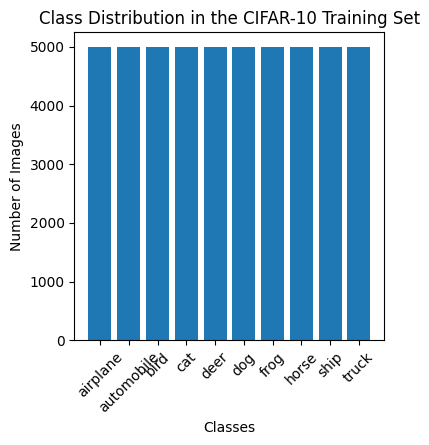

In [ ]:
visualise_dist(x_train,y_train)

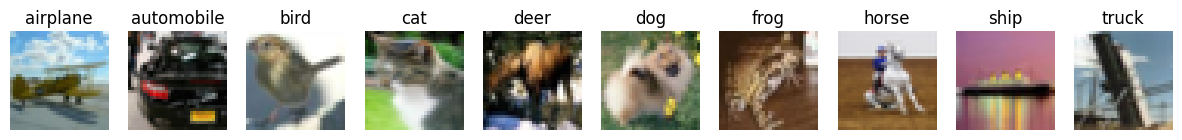

In [ ]:
## Visualizze some radom sample from the dataset
selected_indices = []
for class_id in range(NUM_CLASSES):
    indices = np.where(y_train == class_id)[0]
    idx = random.choice(indices)
    selected_indices.append(idx)

plt.figure(figsize=(15, 15))
for i, idx in enumerate(selected_indices):
    plt.subplot(1, NUM_CLASSES, i + 1)
    plt.imshow(x_train[idx])
    plt.axis('off')
    plt.title(target_names[y_train[idx][0]])
plt.show()

## Visualisation
To gain a better understanding of the structure and patterns within our CIFAR-10 dataset, we will follow a two-step process:

1. **Dimensionality Reduction with t-SNE:** We will begin by reducing the dimensionality of our data using t-SNE (t-distributed Stochastic Neighbor Embedding). This method is particularly suitable for visualizing non-linear data as it preserves the local structure of the data, making it easier to identify patterns and relationships.

2. **Clustering with K-Means:** Once the data has been reduced in dimensions, we will apply K-Means clustering to identify and create clusters within the data. This will allow us to group similar data points together and gain insights into the underlying structure of our dataset.

By combining t-SNE and K-Means clustering, we can effectively visualize and analyze our high-dimensional CIFAR-10 dataset, leading to a deeper understanding of its structure and patterns.

### Transform and clustering

In [ ]:
X = x_train.reshape(x_train.shape[0], -1)
y = y_train.reshape(-1)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X)

# create a KMeans object
kmeans = KMeans(n_clusters=10, random_state=0)
# fit the KMeans on the t-SNE transformed data
kmeans.fit(X_tsne)
# predict the cluster labels
y_predX_tsne = kmeans.predict(X_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualisation

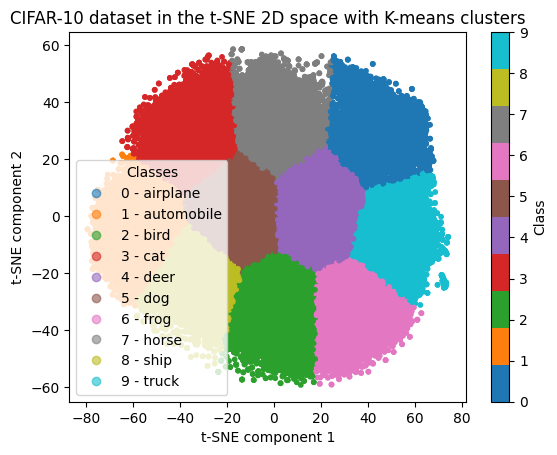

In [ ]:
scatter=plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_predX_tsne, cmap='tab10', s=10)
plt.colorbar(label='Class')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with K-means clusters')
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
legend_labels = [f"{i} - {target_names[name]}" for i, name in enumerate(target_names)]
plt.legend(handles, legend_labels, title="Classes")
plt.show()

# TRAINING BASIC CNNs FROM SCRATCH

Train  from scratch on the CIFAR-10 training set and use a portion of the training set for validation, experiment with

- Few different architectures
- Regularisation strategies
- Ultimately evaluate your final model on the hold-out test set.
- Evaluate your final model on the test set once,
- do not look at your model's classification performance on the test set while

## Load data and setup scheduler

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
time_callback = TimeHistory()

## Approache 0
We commence with a fully connected artificial neural network (ANN), which is not tailored to address this particular problem.

### Model

In [ ]:
def CIFAR10Model0(inputs):
  model=Sequential()
  model.add(Flatten(input_shape=inputs))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model


In [ ]:
model0 = CIFAR10Model0(INPUTS)
model0.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Visualisation of the architecture
model0.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_19 (Dense)            (None, 32)                98336     
                                                                 
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 10)                2570      
                                                                 
Total params: 144362 (563.91 KB)
Trainable params: 144

### Training

In [ ]:
## Train the model
history0 = model0.fit(x_train, y_train,validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[time_callback,early_stopping])

Epoch 1/100
176/176 [==============================] - 3s 7ms/step - loss: 1.9191 - accuracy: 0.2968 - val_loss: 1.8083 - val_accuracy: 0.3446
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 1.7309 - accuracy: 0.3742 - val_loss: 1.6967 - val_accuracy: 0.3904
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 1.6703 - accuracy: 0.3990 - val_loss: 1.6704 - val_accuracy: 0.3990
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 1.6180 - accuracy: 0.4157 - val_loss: 1.6321 - val_accuracy: 0.4158
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 1.5719 - accuracy: 0.4331 - val_loss: 1.5735 - val_accuracy: 0.4306
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 1.5498 - accuracy: 0.4436 - val_loss: 1.6114 - val_accuracy: 0.4252
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 1.5142 - accuracy: 0.4550 - val_loss: 1.5514 - val_accuracy: 0.4448

### Plot

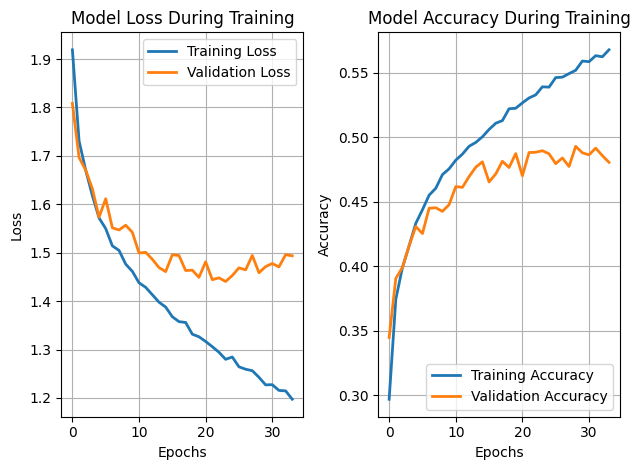

In [ ]:
plot_loss_and_accuracy(history0)

## Approache 1
There we start with three convolutions with max-pooling, followed by dense layers.

1. Convolutional Layer with 32 filters, ReLU activation, and same padding.
2. MaxPooling Layer with a 2x2 pooling window.
3. Convolutional Layer with 64 filters, ReLU activation, and same padding.
4. MaxPooling Layer with a 2x2 pooling window.
5. Convolutional Layer with 64 filters, ReLU activation, and same padding.
6. MaxPooling Layer with a 2x2 pooling window.
7. Flatten Layer.
8. Dense Layer with 512 neurons and ReLU activation.
9. Dense Output Layer with 10 neurons and softmax activation.

### Model

In [ ]:
def CIFAR10Model1(inputs):
  model=Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=inputs))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add( MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add( MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model1 = CIFAR10Model1(INPUTS)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Visualisation of the architecture
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_244 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_245 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_246 (Conv2D)         (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 4, 4, 64)         

### Training

In [ ]:
## Train the model
history1 = model1.fit(x_train, y_train,validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[time_callback,early_stopping])

Epoch 1/100
176/176 [==============================] - 4s 12ms/step - loss: 1.6436 - accuracy: 0.4057 - val_loss: 1.3698 - val_accuracy: 0.5058
Epoch 2/100
176/176 [==============================] - 2s 9ms/step - loss: 1.2727 - accuracy: 0.5458 - val_loss: 1.1404 - val_accuracy: 0.5934
Epoch 3/100
176/176 [==============================] - 2s 9ms/step - loss: 1.0899 - accuracy: 0.6164 - val_loss: 1.0198 - val_accuracy: 0.6398
Epoch 4/100
176/176 [==============================] - 2s 9ms/step - loss: 0.9723 - accuracy: 0.6601 - val_loss: 0.9649 - val_accuracy: 0.6606
Epoch 5/100
176/176 [==============================] - 2s 9ms/step - loss: 0.8758 - accuracy: 0.6946 - val_loss: 0.8771 - val_accuracy: 0.6986
Epoch 6/100
176/176 [==============================] - 2s 9ms/step - loss: 0.8071 - accuracy: 0.7188 - val_loss: 0.8474 - val_accuracy: 0.7072
Epoch 7/100
176/176 [==============================] - 2s 9ms/step - loss: 0.7478 - accuracy: 0.7433 - val_loss: 0.8040 - val_accuracy: 0.725

### Plot

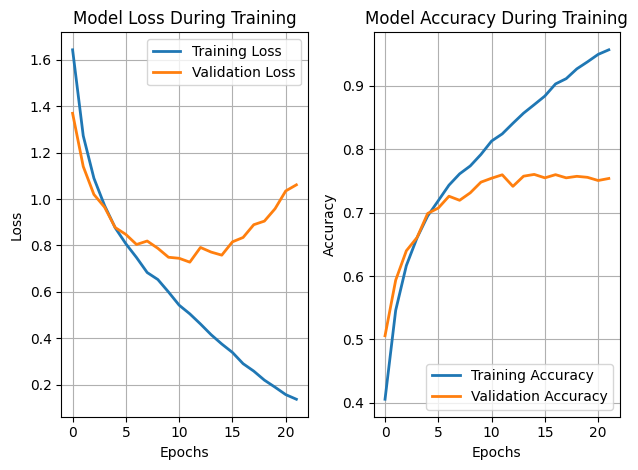

In [ ]:
plot_loss_and_accuracy(history1)

## Approache 2

Using the  `model 1`, we added:
- Another `convolutional layer` before the MaxPooling Layer


### Model

In [ ]:
def CIFAR10Model2(inputs):
  model=Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=inputs))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add( MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add( MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model2 = CIFAR10Model2(INPUTS)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_247 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_248 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_249 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_250 (Conv2D)         (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                

### Training

In [ ]:
## Train the model
history2 = model2.fit(x_train, y_train,validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[time_callback,early_stopping])

Epoch 1/100
  5/176 [..............................] - ETA: 4s - loss: 2.3004 - accuracy: 0.0820

176/176 [==============================] - 6s 22ms/step - loss: 1.6889 - accuracy: 0.3808 - val_loss: 1.3193 - val_accuracy: 0.5186
Epoch 2/100
176/176 [==============================] - 3s 19ms/step - loss: 1.2210 - accuracy: 0.5616 - val_loss: 1.0629 - val_accuracy: 0.6202
Epoch 3/100
176/176 [==============================] - 3s 19ms/step - loss: 0.9880 - accuracy: 0.6541 - val_loss: 0.9196 - val_accuracy: 0.6812
Epoch 4/100
176/176 [==============================] - 3s 19ms/step - loss: 0.8410 - accuracy: 0.7031 - val_loss: 0.8268 - val_accuracy: 0.7082
Epoch 5/100
176/176 [==============================] - 3s 19ms/step - loss: 0.7201 - accuracy: 0.7468 - val_loss: 0.7538 - val_accuracy: 0.7440
Epoch 6/100
176/176 [==============================] - 3s 19ms/step - loss: 0.6386 - accuracy: 0.7765 - val_loss: 0.7441 - val_accuracy: 0.7378
Epoch 7/100
176/176 [==============================] - 3s 19ms/step - loss: 0.5613 - accuracy: 0.8005 - val_loss: 0.7159 - val_accuracy: 0.7534
Epoc

### Plot

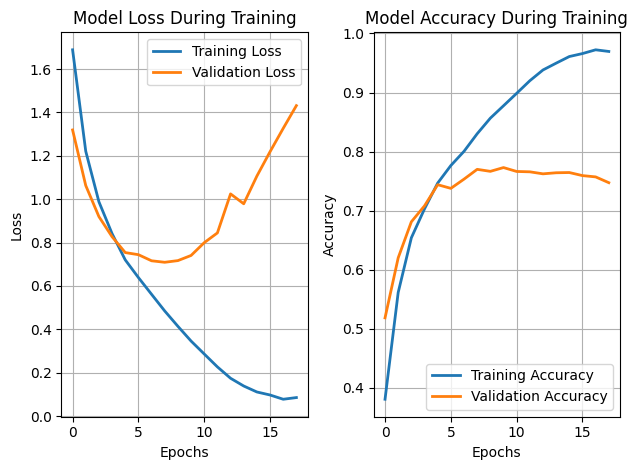

In [ ]:
plot_loss_and_accuracy(history2)

## Approache 3

Here, we use the `model 2` and we add
- `Dropout layer` with `rate=0.4` after MaxPooling Layer

Adding a `Dropout layer` with `rate=0.4` after the MaxPooling layer in Model 2 helps prevent overfitting by randomly deactivating 40% of the neurons during training. This encourages the network to develop more robust features and generalize better to unseen data.

### Description

Here, we use the `model 2` and we add
- `Dropout layer` with `rate=0.4` after MaxPooling Layer

Adding a `Dropout layer` with `rate=0.4` after the MaxPooling layer in Model 2 helps prevent overfitting by randomly deactivating 40% of the neurons during training. This encourages the network to develop more robust features and generalize better to unseen data.

### Model

In [ ]:
def CIFAR10Model3(inputs):
  model=Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=inputs))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
inputs=(32, 32, 3)
model3 = CIFAR10Model3(INPUTS)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_253 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_254 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_255 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_256 (Conv2D)         (None, 16, 16, 64)        36928     
                                                     

### Training

In [ ]:
## Train the model
history3 = model3.fit(x_train, y_train,validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[time_callback,early_stopping],verbose=1)

Epoch 1/100
  5/176 [..............................] - ETA: 6s - loss: 2.3046 - accuracy: 0.1086

176/176 [==============================] - 7s 27ms/step - loss: 1.8958 - accuracy: 0.2932 - val_loss: 1.5465 - val_accuracy: 0.4298
Epoch 2/100
176/176 [==============================] - 4s 25ms/step - loss: 1.4930 - accuracy: 0.4534 - val_loss: 1.2804 - val_accuracy: 0.5326
Epoch 3/100
176/176 [==============================] - 4s 25ms/step - loss: 1.2843 - accuracy: 0.5359 - val_loss: 1.1030 - val_accuracy: 0.6092
Epoch 4/100
176/176 [==============================] - 4s 25ms/step - loss: 1.1605 - accuracy: 0.5810 - val_loss: 1.0197 - val_accuracy: 0.6394
Epoch 5/100
176/176 [==============================] - 4s 25ms/step - loss: 1.0699 - accuracy: 0.6165 - val_loss: 0.9393 - val_accuracy: 0.6700
Epoch 6/100
176/176 [==============================] - 4s 25ms/step - loss: 1.0023 - accuracy: 0.6416 - val_loss: 0.8946 - val_accuracy: 0.6836
Epoch 7/100
176/176 [==============================] - 4s 25ms/step - loss: 0.9416 - accuracy: 0.6650 - val_loss: 0.8202 - val_accuracy: 0.7110
Epoc

### Plot

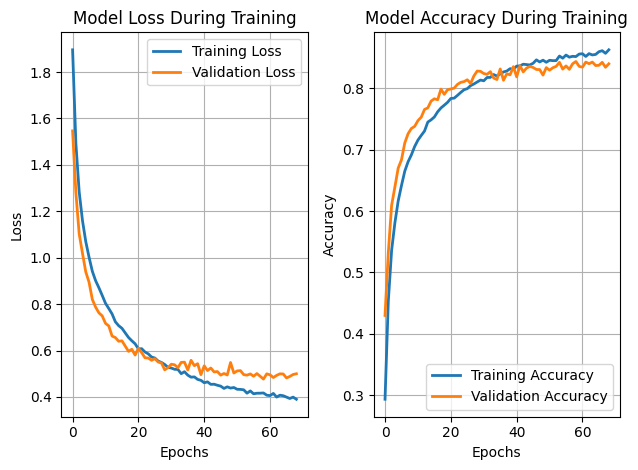

In [ ]:
plot_loss_and_accuracy(history3)

## Approache 4
Based on `model 3`, we added:

- `BatchNormalization Layer` after each CONV2D Layer
- We setup `schedule Learning rate`

Adding a `BatchNormalization` layer after each Conv2D layer normalizes the activations, speeding up convergence and improving stability during training.

Setting up a scheduled learning rate allows the learning rate to adjust during training, often starting higher to speed up initial learning and then decreasing to fine-tune the model.

### Model

In [ ]:
def CIFAR10Model4(inputs):
  model=Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=inputs))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model4 = CIFAR10Model4(INPUTS)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_259 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_230 (B  (None, 32, 32, 32)        128       
 atchNormalization)                                              
                                                                 
 conv2d_260 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_231 (B  (None, 32, 32, 32)        128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                     

### Training

In [ ]:
history4 = model4.fit(x_train, y_train,validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[time_callback,lr_reduction,early_stopping])

Epoch 1/100
  5/176 [..............................] - ETA: 7s - loss: 4.1420 - accuracy: 0.1250

176/176 [==============================] - 10s 37ms/step - loss: 1.8286 - accuracy: 0.3633 - val_loss: 3.5862 - val_accuracy: 0.1020 - lr: 0.0010
Epoch 2/100
176/176 [==============================] - 6s 35ms/step - loss: 1.3504 - accuracy: 0.5119 - val_loss: 2.9802 - val_accuracy: 0.2224 - lr: 0.0010
Epoch 3/100
176/176 [==============================] - 6s 34ms/step - loss: 1.1764 - accuracy: 0.5782 - val_loss: 1.2028 - val_accuracy: 0.5832 - lr: 0.0010
Epoch 4/100
176/176 [==============================] - 6s 34ms/step - loss: 1.0640 - accuracy: 0.6171 - val_loss: 1.1945 - val_accuracy: 0.5874 - lr: 0.0010
Epoch 5/100
176/176 [==============================] - 6s 35ms/step - loss: 0.9842 - accuracy: 0.6480 - val_loss: 0.8921 - val_accuracy: 0.6938 - lr: 0.0010
Epoch 6/100
176/176 [==============================] - 6s 34ms/step - loss: 0.9099 - accuracy: 0.6754 - val_loss: 0.8295 - val_accuracy: 0.7154 - lr: 0.0010
Epoch 7/100
176/176 [==============================] - 6s 34ms/step -

### Plot

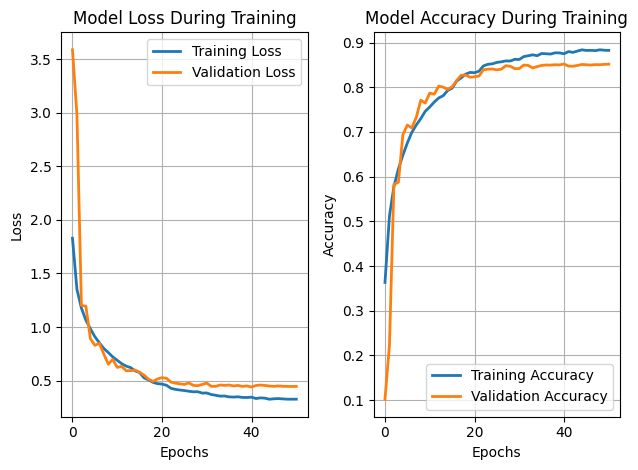

In [ ]:
plot_loss_and_accuracy(history4)

## Approache 5
Based on the `model 4`, we added :

- The depth of the network with 2 block of `(CONV2D with 128 filter + BatchNorm)+ (CONV2D with 128 filter + BatchNorm)  + Dropout`
- We added also `kernel regularizer` at each CONV2D layer

Adding the depth helps the model to capture conplex representation

Adding a `kernel_regularizer` to each Conv2D layer helps prevent overfitting by penalizing large weights, encouraging the network to learn simpler, more generalizable patterns.

### Model

In [ ]:
def CIFAR10Model5(inputs):
  model=Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01), input_shape=inputs))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add( MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model5 = CIFAR10Model5(INPUTS)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_265 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_236 (B  (None, 32, 32, 32)        128       
 atchNormalization)                                              
                                                                 
 conv2d_266 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_237 (B  (None, 32, 32, 32)        128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                     

### Training

In [ ]:
history5 = model5.fit(x_train, y_train,validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[time_callback,lr_reduction,early_stopping])

Epoch 1/100
  5/176 [..............................] - ETA: 9s - loss: 12.5318 - accuracy: 0.1055

176/176 [==============================] - 13s 44ms/step - loss: 8.3148 - accuracy: 0.2728 - val_loss: 6.2619 - val_accuracy: 0.1026 - lr: 0.0010
Epoch 2/100
176/176 [==============================] - 7s 39ms/step - loss: 3.5745 - accuracy: 0.4624 - val_loss: 3.9678 - val_accuracy: 0.0958 - lr: 0.0010
Epoch 3/100
176/176 [==============================] - 7s 39ms/step - loss: 2.1542 - accuracy: 0.5564 - val_loss: 3.4813 - val_accuracy: 0.2068 - lr: 0.0010
Epoch 4/100
176/176 [==============================] - 7s 39ms/step - loss: 1.7193 - accuracy: 0.6128 - val_loss: 1.7927 - val_accuracy: 0.5520 - lr: 0.0010
Epoch 5/100
176/176 [==============================] - 7s 39ms/step - loss: 1.5452 - accuracy: 0.6511 - val_loss: 1.7157 - val_accuracy: 0.6082 - lr: 0.0010
Epoch 6/100
176/176 [==============================] - 7s 39ms/step - loss: 1.4809 - accuracy: 0.6736 - val_loss: 1.6644 - val_accuracy: 0.5830 - lr: 0.0010
Epoch 7/100
176/176 [==============================] - 7s 39ms/step -

### Plot

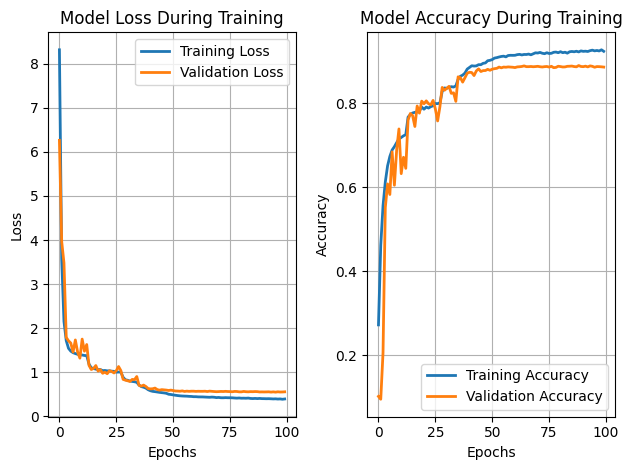

In [ ]:
plot_loss_and_accuracy(history5)

## SUMMARY

There we will present the different improment of our model

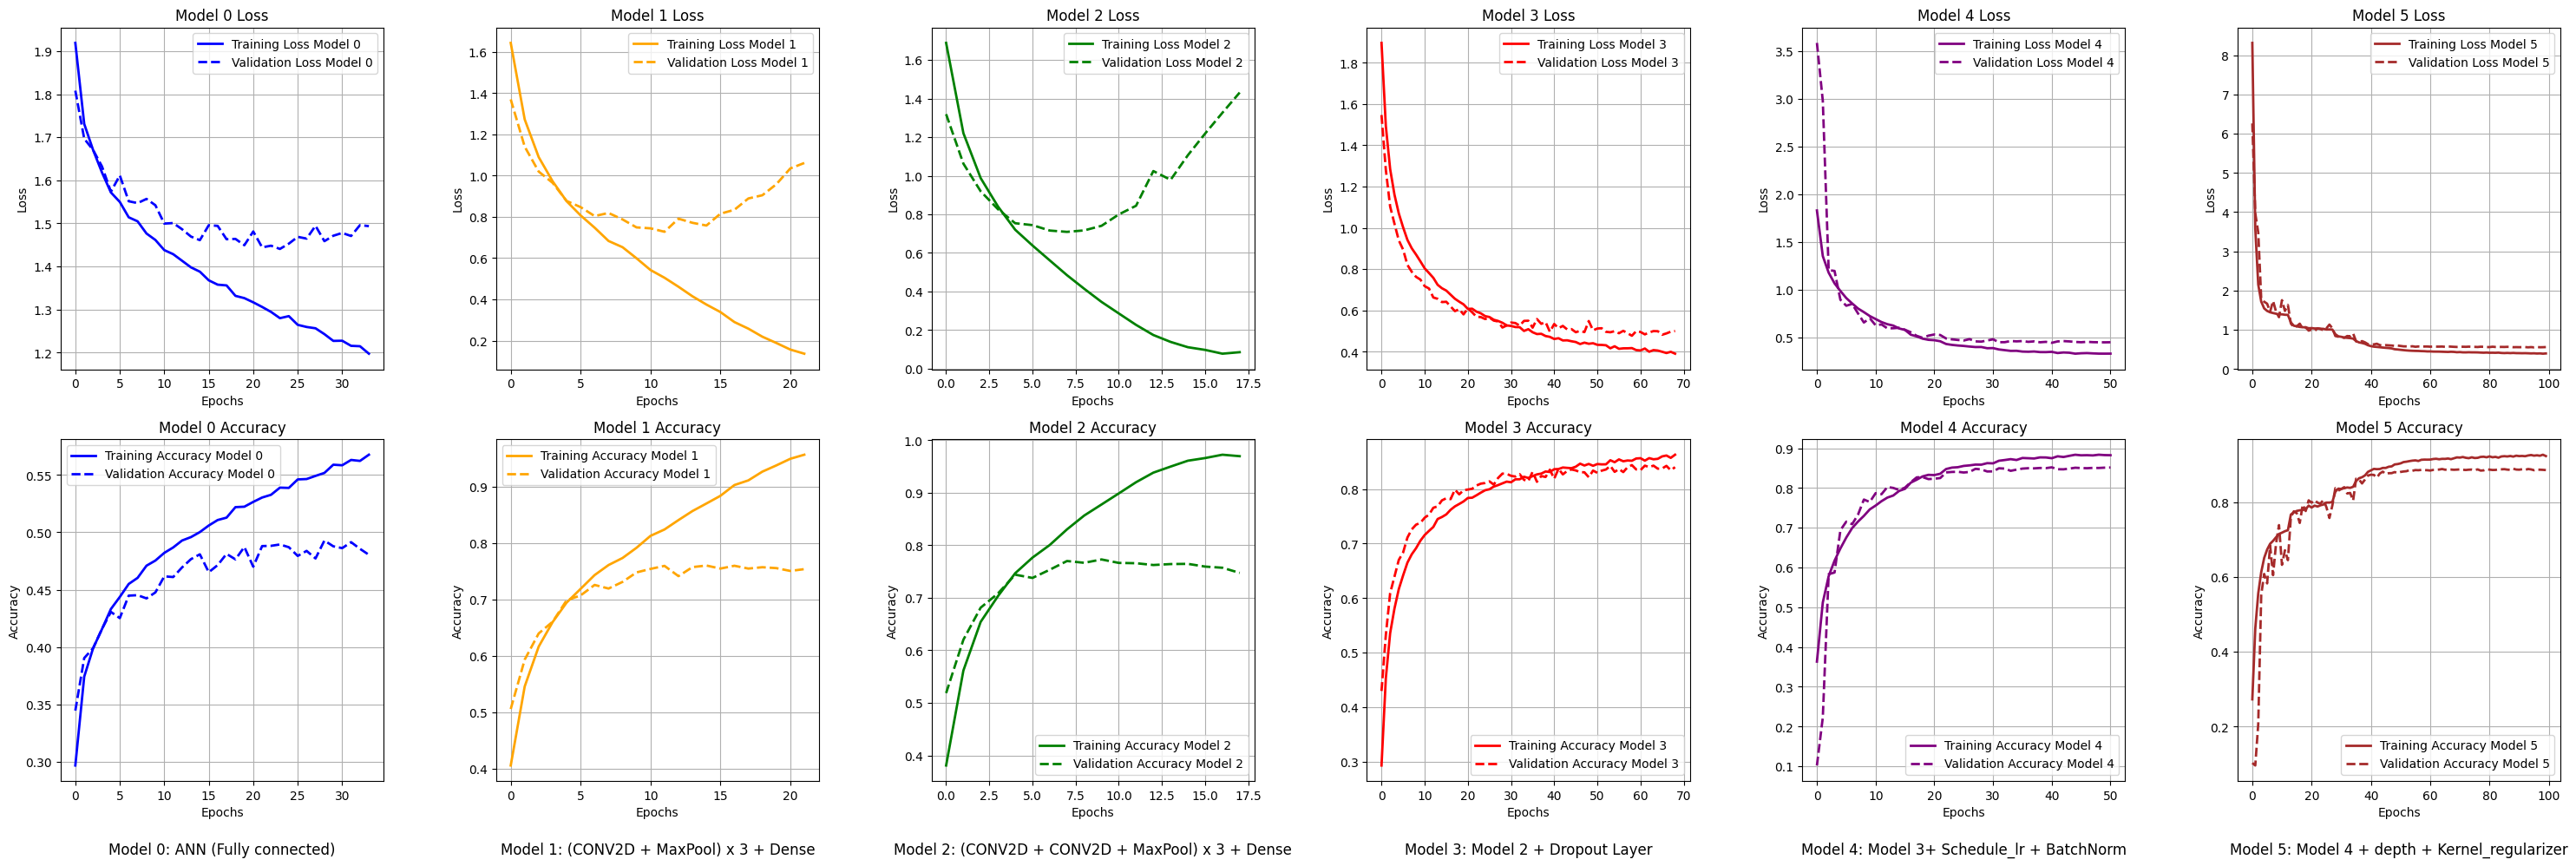

In [ ]:
histories = [history0,history1, history2, history3, history4, history5]
model_infos = [
    "Model 0: ANN (Fully connected)",
    "Model 1: (CONV2D + MaxPool) x 3 + Dense",
    "Model 2: (CONV2D + CONV2D + MaxPool) x 3 + Dense",
    "Model 3: Model 2 + Dropout Layer",
    "Model 4: Model 3+ Schedule_lr + BatchNorm",
    "Model 5: Model 4 + depth + Kernel_regularizer"
]

plot_multiple_histories(histories, model_infos)


**INTERPRETATION**

- As we see ANN are not adapted for this kind of problem witth we can notice the very bad performance
- Between the model 1 and model 2 we notice a very improvement of the result is still bad and the model goes to overfitting more fastly
- To reduce this problem of overfitting we've added a dropout layer and we can notice a very good result
- For the model 4, we still try to accelerate the convergence of the model with batchNormalisation and and an adaptative learning rate
- For the model 5, we increase the depth of the network to help the model to capture more detail and we added some regularizer at each layer

All this step helps us to get a good model and we notice the importance of regularizer in our model

## EVALUATE THE FINAL MODEL : MODEL5

In [ ]:
test_loss, test_acc = model5.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.5718 - accuracy: 0.8770
Test accuracy: 0.8769999742507935


In [ ]:
y_true = np.argmax(y_test, axis=1)

Y_pred = model5.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

target_names = [
      'airplane', 'automobile', 'bird', 'cat', 'deer',
      'dog', 'frog', 'horse', 'ship', 'truck'
]

report = classification_report(y_true, y_pred, target_names=target_names)


print("Classification Report:\n", report)

313/313 - 1s - 960ms/epoch - 3ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.89      0.88      0.88      1000
  automobile       0.94      0.94      0.94      1000
        bird       0.85      0.80      0.82      1000
         cat       0.78      0.73      0.76      1000
        deer       0.86      0.90      0.88      1000
         dog       0.84      0.81      0.83      1000
        frog       0.83      0.94      0.89      1000
       horse       0.95      0.89      0.92      1000
        ship       0.93      0.94      0.94      1000
       truck       0.91      0.93      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# The model 5 which is the improvement of all of the other model get  a very good accuracy of **88%**

# TRANSFERT LEARNING

The task is again to train a classification model for CIFAR-10, but this time with transfer learning.
- Load a model with pre-trained weights into your environment. You may choose any one of the available models
(VGG, Inception, ResNet, DenseNet, EfficientNet, etc.), but give a short motivation for your choice.
- Also find out and explain how the difference in image dimensions between ImageNet and CIFAR-10 can be
handled.
- Replace the pre-trained model’s classification layers with one or two new layers, freeze the weights of the feature extraction (convolutional) layers, and train the new layers.
- You may also experiment with fine-tuning all the convolutional layers.
- Compare training times and test accuracies with your best model from Problem 1 above.


## Justification
Using InceptionResNetV2 for CIFAR-10 is a good choice because it strikes a balance between complexity and performance. Here's a brief explanation of how to handle the difference in image dimensions between ImageNet and CIFAR-10 when using a pre-trained model like InceptionResNetV2:



In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=1, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
def preprocess_data(X,Y):
  x=tf.keras.applications.inception_resnet_v2.preprocess_input(X)
  #x = tf.keras.applications.resnet.preprocess_input(X)
  y= to_categorical(Y, 10)
  return x,y

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Preprocessing

In [ ]:
x_train,y_train=preprocess_data(x_train,y_train)
x_test, y_test=preprocess_data(x_test, y_test)

In [ ]:
base_model=k.applications.InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(299,299,3))

**Resize Images:** CIFAR-10 images are 32x32 pixels, while ImageNet images are typically larger, such as 299x299 pixels (for InceptionResNetV2). You'll need to resize CIFAR-10 images to match the input size expected by the pre-trained InceptionResNetV2 model.

In [ ]:
inputs=k.Input(shape=(32,32,3))
input=k.layers.Lambda(lambda image : tf.image.resize(image,(299,299)))(inputs)

In [ ]:
x=base_model(input,training=False)
x= k.layers.GlobalAveragePooling2D()(x)
x=k.layers.BatchNormalization()(x)
x=k.layers.Dense(512,activation='relu',kernel_regularizer=l2(0.01))(x)
x=k.layers.Dropout(0.3)(x)
outputs=k.layers.Dense(10,activation='softmax')(x)
model_TL=k.Model(inputs,outputs)

In [ ]:
base_model.trainable=False
optimizer=k.optimizers.Adam()
model_TL.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
model_TL.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 299, 299, 3)       0         
                                                                 
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_203 (B  (None, 1536)              6144      
 atchNormalization)                                              
                                                             

In [ ]:
history = model_TL.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=15, batch_size=BATCH_SIZE,callbacks=[time_callback,lr_reduction,early_stopping], verbose=1)

Epoch 1/15
196/196 [==============================] - 597s 3s/step - loss: 2.3594 - accuracy: 0.8835 - val_loss: 0.6091 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 2/15
196/196 [==============================] - 532s 3s/step - loss: 0.4999 - accuracy: 0.8958 - val_loss: 0.4879 - val_accuracy: 0.8997 - lr: 0.0010
Epoch 3/15
196/196 [==============================] - ETA: 0s - loss: 0.4868 - accuracy: 0.8969
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
196/196 [==============================] - 532s 3s/step - loss: 0.4868 - accuracy: 0.8969 - val_loss: 0.4801 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 4/15
196/196 [==============================] - 532s 3s/step - loss: 0.4006 - accuracy: 0.9086 - val_loss: 0.3772 - val_accuracy: 0.9111 - lr: 5.0000e-04
Epoch 5/15
196/196 [==============================] - ETA: 0s - loss: 0.3818 - accuracy: 0.9111
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
196/196 [==============================

In [ ]:
result=model_TL.evaluate(x_test,y_test)
result

313/313 [==============================] - 99s 300ms/step - loss: 0.2846 - accuracy: 0.9252


[0.2845819294452667, 0.9251999855041504]

In [ ]:
y_true = np.argmax(y_test, axis=1)

Y_pred = model_TL.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

target_names = [
      'airplane', 'automobile', 'bird', 'cat', 'deer',
      'dog', 'frog', 'horse', 'ship', 'truck'
]

report = classification_report(y_true, y_pred, target_names=target_names)


print("Classification Report:\n", report)

313/313 - 95s - 95s/epoch - 304ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.93      0.94      0.93      1000
  automobile       0.96      0.95      0.96      1000
        bird       0.92      0.89      0.91      1000
         cat       0.87      0.87      0.87      1000
        deer       0.90      0.91      0.91      1000
         dog       0.91      0.89      0.90      1000
        frog       0.93      0.94      0.94      1000
       horse       0.95      0.95      0.95      1000
        ship       0.94      0.96      0.95      1000
       truck       0.95      0.94      0.95      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



## FINE -TUNING

### Freeze and unfreeze some Layer

We can unfreeze some of the deeper layers of the base model and continue training to fine-tune the entire network.

In [ ]:
for layer in base_model.layers:
  layer.trainable=True

In [ ]:
optimizer=k.optimizers.Adam()
model_TL.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
model_TL.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 299, 299, 3)       0         
                                                                 
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_203 (B  (None, 1536)              6144      
 atchNormalization)                                              
                                                             

In [ ]:
history_ft = model_TL.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=15, batch_size=BATCH_SIZE,callbacks=[time_callback,lr_reduction,early_stopping], verbose=1)

Epoch 1/15
196/196 [==============================] - 547s 3s/step - loss: 0.5180 - accuracy: 0.8941 - val_loss: 0.5099 - val_accuracy: 0.8971 - lr: 0.0010
Epoch 2/15
196/196 [==============================] - 532s 3s/step - loss: 0.4832 - accuracy: 0.8999 - val_loss: 0.4707 - val_accuracy: 0.9035 - lr: 0.0010
Epoch 3/15
196/196 [==============================] - ETA: 0s - loss: 0.4853 - accuracy: 0.8973
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
196/196 [==============================] - 532s 3s/step - loss: 0.4853 - accuracy: 0.8973 - val_loss: 0.4716 - val_accuracy: 0.9019 - lr: 0.0010
Epoch 4/15
196/196 [==============================] - 533s 3s/step - loss: 0.3860 - accuracy: 0.9133 - val_loss: 0.3704 - val_accuracy: 0.9135 - lr: 5.0000e-04
Epoch 5/15
196/196 [==============================] - ETA: 0s - loss: 0.3630 - accuracy: 0.9132
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
196/196 [==============================

In [ ]:
history_ft = model_TL.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=5, batch_size=BATCH_SIZE,callbacks=[time_callback,lr_reduction,early_stopping], verbose=1)

Epoch 1/5
196/196 [==============================] - 534s 3s/step - loss: 0.2262 - accuracy: 0.9452 - val_loss: 0.2795 - val_accuracy: 0.9261 - lr: 1.5625e-05
Epoch 2/5
196/196 [==============================] - ETA: 0s - loss: 0.2232 - accuracy: 0.9463
Epoch 2: ReduceLROnPlateau reducing learning rate to 1e-05.
196/196 [==============================] - 533s 3s/step - loss: 0.2232 - accuracy: 0.9463 - val_loss: 0.2791 - val_accuracy: 0.9248 - lr: 1.5625e-05
Epoch 3/5
196/196 [==============================] - 533s 3s/step - loss: 0.2224 - accuracy: 0.9469 - val_loss: 0.2784 - val_accuracy: 0.9259 - lr: 1.0000e-05
Epoch 4/5
196/196 [==============================] - 533s 3s/step - loss: 0.2200 - accuracy: 0.9481 - val_loss: 0.2775 - val_accuracy: 0.9263 - lr: 1.0000e-05
Epoch 5/5
196/196 [==============================] - 533s 3s/step - loss: 0.2211 - accuracy: 0.9472 - val_loss: 0.2770 - val_accuracy: 0.9257 - lr: 1.0000e-05
Total training time: 2664.75 seconds


In [ ]:
result=model_TL.evaluate(x_test,y_test)
result

313/313 [==============================] - 94s 301ms/step - loss: 0.2770 - accuracy: 0.9257


[0.2770048975944519, 0.9257000088691711]

In [ ]:
y_true = np.argmax(y_test, axis=1)

Y_pred = model_TL.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

target_names = [
      'airplane', 'automobile', 'bird', 'cat', 'deer',
      'dog', 'frog', 'horse', 'ship', 'truck'
]

report = classification_report(y_true, y_pred, target_names=target_names)


print("Classification Report:\n", report)

313/313 - 92s - 92s/epoch - 295ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.93      0.93      0.93      1000
  automobile       0.96      0.95      0.96      1000
        bird       0.93      0.90      0.91      1000
         cat       0.86      0.86      0.86      1000
        deer       0.90      0.91      0.91      1000
         dog       0.92      0.90      0.91      1000
        frog       0.92      0.94      0.93      1000
       horse       0.95      0.95      0.95      1000
        ship       0.94      0.96      0.95      1000
       truck       0.94      0.95      0.95      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# Comparaison


$$
\begin{array}{| l | c | r |}
  \hline
  \text{Model Configuration } & \text{Training Time(seconds)} & \text{Test Accuracy} & \text{F1-score} \\
  \hline
  \text{Best Model from Problem 1 (Model 5)} & \text{11 min 31 s} & \text{0.88} & \text{0.88}\\
  \text{New Model (Frozen Convolutional Base)} & \text{02 h 14 min 10 s} & \text{0.93} & \text{0.93}\\
  \text{Fine-tuned Model} & \text{02 h 57 min 49 s} & \text{0.93} & \text{0.93}\\
  \hline
\end{array}
$$

Globally,
- Performance with Transfert learning and Fine Tuning is better than the scratch model
- Training model with transfert learning take more time because the size of the image is increasing so more computation cost

# Input Masking with VGG16

The goal is to demonstrate how a pretrained model selects important feature maps using input masking.

**Methodology:**

1. **Model Selection**: We use a pretrained InceptionResnet model.
2. **Input Masking**: We occlude parts of the image with a black square for our experiments.
3. **Experimentation**: We perform experiments by moving the black square across the image and observing the model's responses.
4. **Conclusion**: We analyze the results to understand how the model identifies key features.


## Load the pretrain model

In [ ]:
model = VGG16(weights='imagenet')

In [ ]:
!git clone https://github.com/Vilmo18/computer_vision.git

fatal: destination path 'computer_vision' already exists and is not an empty directory.


## **Case 1: Dog and Cat**
We choose a image containing a dog and a cat
1. We occlude the dog
2. We occlude the cat

### Generate occlusion

In [ ]:
image_path = '/content/computer_vision/images/cat_and_dog'


image = cv2.imread(image_path+'.jpg')
resized_image = cv2.resize(image, (224, 224))

# Apply a black square for occult
start_x1, start_y1 = 7, 30
width1, height1 = 100, 100
occluded_image1 = resized_image.copy()
cv2.rectangle(occluded_image1, (start_x1, start_y1), (start_x1 + width1, start_y1 + height1), (0, 0, 0), -1)
occluded_image_path = image_path+'_occ_1.jpg'
cv2.imwrite(occluded_image_path, occluded_image1)

# Occlusion
start_x2, start_y2 = 100, 40
width2, height2 = 100, 100
occluded_image2 = resized_image.copy()
cv2.rectangle(occluded_image2, (start_x2, start_y2), (start_x2 + width2, start_y2 + height2), (0, 0, 0), -1)
occluded_image_path = image_path+'_occ_2.jpg'
cv2.imwrite(occluded_image_path, occluded_image2)

# Occlusion
start_x3, start_y3 = 60, 40
width3, height3 = 80, 80
occluded_image3 = resized_image.copy()
cv2.rectangle(occluded_image3, (start_x3, start_y3), (start_x3 + width3, start_y3 + height3), (0, 0, 0), -1)
occluded_image_path = image_path+'_occ_3.jpg'
cv2.imwrite(occluded_image_path, occluded_image3)

# Convert image COLOR_BGR2RGB
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
occluded_image1_rgb = cv2.cvtColor(occluded_image1, cv2.COLOR_BGR2RGB)
occluded_image2_rgb = cv2.cvtColor(occluded_image2, cv2.COLOR_BGR2RGB)
occluded_image3_rgb = cv2.cvtColor(occluded_image3, cv2.COLOR_BGR2RGB)



### Visualise occulsion

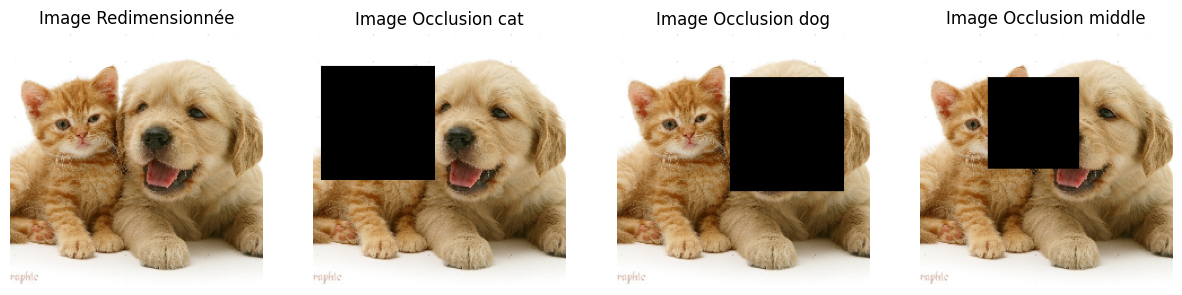

In [ ]:
# Visualise occulsion
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(resized_image_rgb)
plt.title('Image Redimensionnée')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(occluded_image1_rgb)
plt.title('Image Occlusion cat')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(occluded_image2_rgb)
plt.title('Image Occlusion dog')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(occluded_image3_rgb)
plt.title('Image Occlusion middle')
plt.axis('off')

plt.show()

### Transformation of Saliency map

In [ ]:
original_imgs,saliency_maps,top_classes=transformation(image_path)

### Visualisation of Saliency map

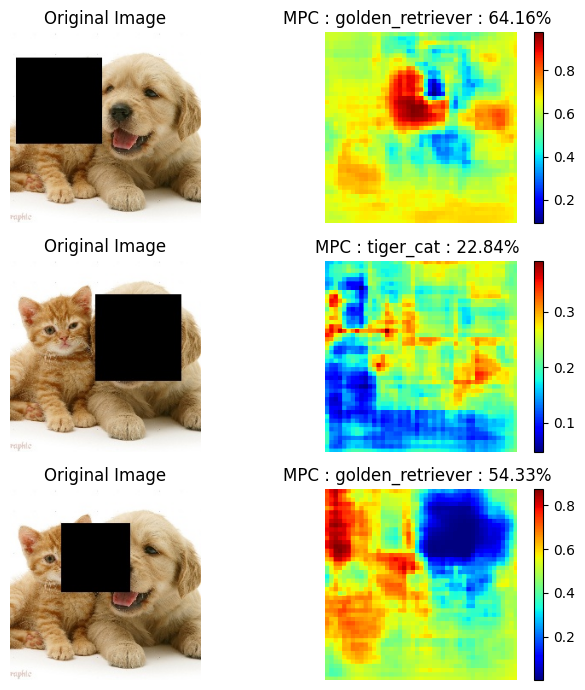

In [ ]:
plt.figure(figsize=(7, 7))
num_images = len(original_imgs)
for i in range(num_images):
    # Plot the original image
    plt.subplot(num_images, 2, 2*i + 1)
    plt.imshow(original_imgs[i])
    plt.title('Original Image')
    plt.axis('off')

    # Plot the saliency map
    plt.subplot(num_images, 2, 2*i + 2)
    plt.imshow(saliency_maps[i], cmap='jet')
    plt.colorbar()
    plt.title(f'MPC : {top_classes[i][0][0]} : {top_classes[i][0][1]*100:.2f}% ')
    plt.axis('off')

plt.tight_layout()
plt.show()


## **Case 2 : Lion**

### Generate occlusion

In [ ]:
image_path = '/content/lion'

def generate_occlusion(image_path):
  image = cv2.imread(image_path+'.jpg')
  resized_image = cv2.resize(image, (224, 224))

  # Apply a black square for occult
  start_x1, start_y1 = 7, 30
  width1, height1 = 100, 100
  occluded_image1 = resized_image.copy()
  cv2.rectangle(occluded_image1, (start_x1, start_y1), (start_x1 + width1, start_y1 + height1), (0, 0, 0), -1)
  occluded_image_path = image_path+'_occ_1.jpg'
  cv2.imwrite(occluded_image_path, occluded_image1)

  # Occlusion
  start_x2, start_y2 = 100, 40
  width2, height2 = 100, 100
  occluded_image2 = resized_image.copy()
  cv2.rectangle(occluded_image2, (start_x2, start_y2), (start_x2 + width2, start_y2 + height2), (0, 0, 0), -1)
  occluded_image_path = image_path+'_occ_2.jpg'
  cv2.imwrite(occluded_image_path, occluded_image2)


  # Occlusion
  start_x3, start_y3 = 30, 20
  width3, height3 = 150, 150

  occluded_image3 = resized_image.copy()
  cv2.rectangle(occluded_image3, (start_x3, start_y3), (start_x3 + width3, start_y3 + height3), (0, 0, 0), -1)
  occluded_image_path = image_path+'_occ_3.jpg'
  cv2.imwrite(occluded_image_path, occluded_image3)

  # Convert image COLOR_BGR2RGB
  resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
  occluded_image1_rgb = cv2.cvtColor(occluded_image1, cv2.COLOR_BGR2RGB)
  occluded_image2_rgb = cv2.cvtColor(occluded_image2, cv2.COLOR_BGR2RGB)
  occluded_image3_rgb = cv2.cvtColor(occluded_image3, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(15, 5))

  plt.subplot(1, 4, 1)
  plt.imshow(resized_image_rgb)
  plt.title('Image Redimensionnée')
  plt.axis('off')

  plt.subplot(1, 4, 2)
  plt.imshow(occluded_image1_rgb)
  plt.title('Image Occlusion lion')
  plt.axis('off')

  plt.subplot(1, 4, 3)
  plt.imshow(occluded_image2_rgb)
  plt.title('Image Occlusion lion')
  plt.axis('off')

  plt.subplot(1, 4, 4)
  plt.imshow(occluded_image3_rgb)
  plt.title('Image Occlusion lion')
  plt.axis('off')

  plt.show()


### Visualise occulsion

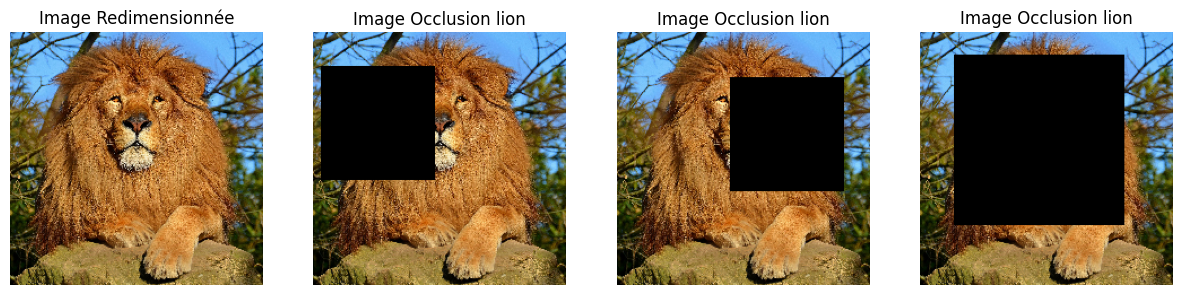

In [ ]:
generate_occlusion(image_path)

### Transformation of Saliency map

In [ ]:
image_path = '/content/computer_vision/images/lion'
original_imgs,saliency_maps,top_classes=transformation(image_path)

### Visualisation of Saliency map

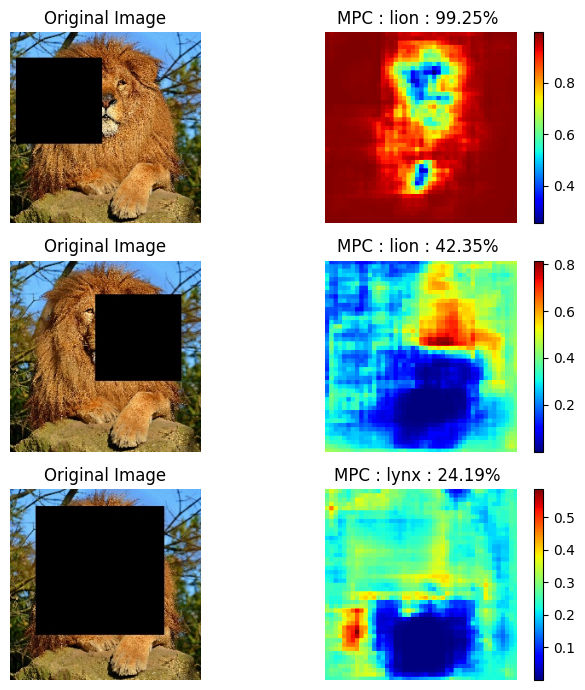

In [ ]:
plt.figure(figsize=(7, 7))
num_images = len(original_imgs)
for i in range(num_images):
    # Plot the original image
    plt.subplot(num_images, 2, 2*i + 1)
    plt.imshow(original_imgs[i])
    plt.title('Original Image')
    plt.axis('off')

    # Plot the saliency map
    plt.subplot(num_images, 2, 2*i + 2)
    plt.imshow(saliency_maps[i], cmap='jet')
    plt.colorbar()
    plt.title(f'MPC : {top_classes[i][0][0]} : {top_classes[i][0][1]*100:.2f}% ')
    plt.axis('off')

plt.tight_layout()
plt.show()
